In [94]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import skew,kurtosis,norm,zscore,iqr
import statistics as st


Importing the Dataset (loans.csv)

In [4]:
df=pd.read_csv("loans.csv",index_col="client_id")
df.sample(10)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
38537,home,2525,0,10508,2003-05-29,2005-10-14,3.14
48177,credit,659,1,10684,2014-10-05,2017-01-16,1.52
29841,other,9115,0,10144,2001-10-22,2004-05-16,3.96
44601,home,4475,1,10362,2005-07-29,2007-07-06,6.58
35214,cash,3872,1,10741,2002-02-27,2003-12-29,0.57
32961,other,4239,1,10802,2003-11-08,2006-04-30,3.93
39384,cash,3557,0,11100,2014-04-21,2016-12-29,4.16
46109,cash,6177,1,11141,2007-03-12,2009-04-26,9.48
32726,other,1710,1,10522,2000-06-12,2002-05-08,0.31


identifying dataset

In [5]:
df.shape

(443, 7)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [23]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [37]:
df['loan_start']=pd.to_datetime(df['loan_start'])
df['loan_end']=pd.to_datetime(df['loan_end'])


In [114]:
df['date_diff']=df['loan_end']-df['loan_start']
df['diff_mpnths']=df['date_diff']/30
df['diff_year']=df['date_diff']/365
df


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,date_diff,rate_norm,diff_mpnths,diff_year
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613 days,1.466288,20 days 10:24:00,1 days 16:18:24.657534246
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635 days,1.118034,21 days 04:00:00,1 days 17:45:12.328767123
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519 days,0.824621,17 days 07:12:00,1 days 10:07:33.698630136
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879 days,1.113553,29 days 07:12:00,2 days 09:47:50.136986301
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684 days,1.769181,22 days 19:12:00,1 days 20:58:31.232876712
...,...,...,...,...,...,...,...,...,...,...,...
26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46,928 days,1.568439,30 days 22:24:00,2 days 13:01:09.041095890
26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27,511 days,2.295648,17 days 00:48:00,1 days 09:36:00
26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65,948 days,2.376973,31 days 14:24:00,2 days 14:20:03.287671232


In [7]:
df. describe()

,loan_amount,repaid,loan_id,rate
count,443.000000,443.000000,443.000000,443.000000
mean,7982.311512,0.534989,11017.101580,3.217156
std,4172.891992,0.499338,581.826222,2.397168
min,559.000000,0.000000,10009.000000,0.010000
25%,4232.500000,0.000000,10507.500000,1.220000
50%,8320.000000,1.000000,11033.000000,2.780000
75%,11739.000000,1.000000,11526.000000,4.750000
max,14971.000000,1.000000,11991.000000,12.620000


Detecting the Missing Value and Treatinf it 

In [40]:
missing=df.isnull().sum()
missing

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
date_diff      0
dtype: int64

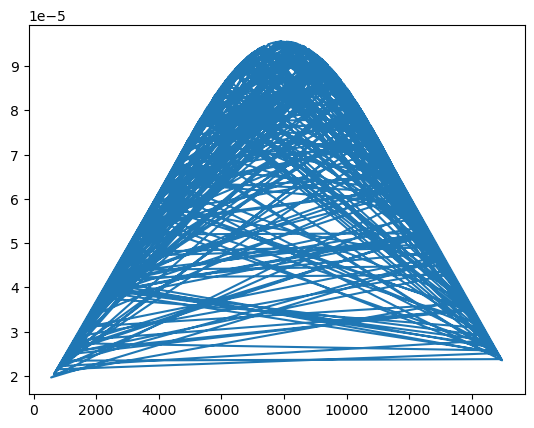

In [96]:
means=np.mean(df['loan_amount'])
sd=st.stdev(df['loan_amount'])
plt.plot(df['loan_amount'],norm.pdf(df['loan_amount'],means,sd))

plt.show()

C:\Users\haris\AppData\Local\Temp\ipykernel_15780\258400812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amount'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan_amount', ylabel='Density'>

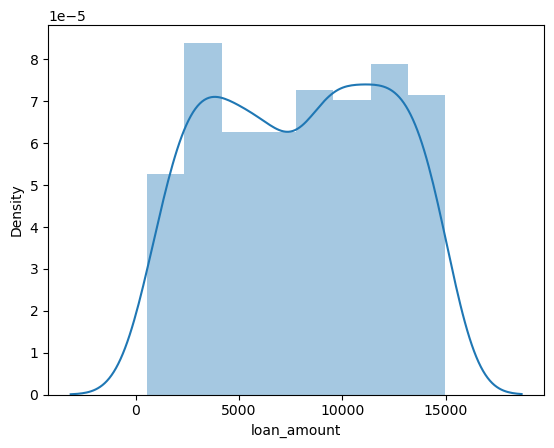

In [97]:
sns.distplot(df['loan_amount'])

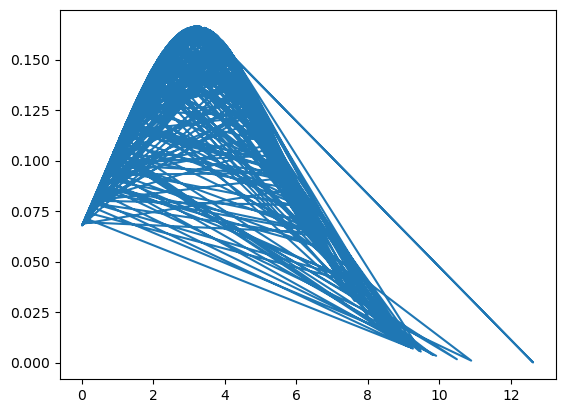

In [92]:

means=np.mean(df['rate'])
sd=st.stdev(df['rate'])
plt.plot(df['rate'],norm.pdf(df['rate'],means,sd))

plt.show()

C:\Users\haris\AppData\Local\Temp\ipykernel_15780\464752516.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rate', ylabel='Density'>

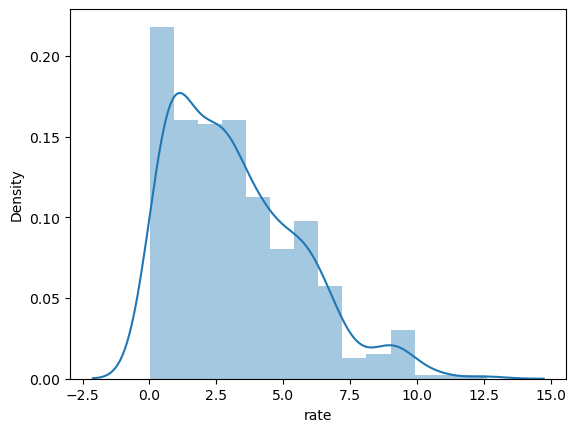

In [95]:
sns.distplot(df['rate'])

Outlier Detection and Treatment 

<function matplotlib.pyplot.show(close=None, block=None)>

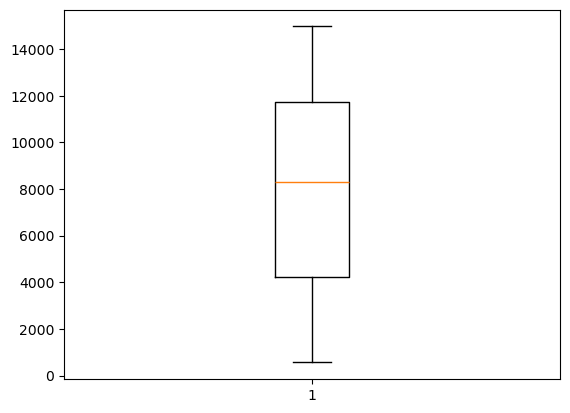

In [58]:
plt.boxplot(df['loan_amount'])
plt.show

In [89]:
out=[]
v=df.loan_amount
for x in v: 
    zscoreval=zscore(x)
    if zscoreval>3 or zscoreval<-3:
        out.append(x)
print(out)


client_id
46109    13672
46109     9794
46109    12734
46109    12518
46109    14049
         ...  
26945    12963
26945     1728
26945     9329
26945     4197
26945     3643
Name: loan_amount, Length: 443, dtype: int64


AxisError: axis 0 is out of bounds for array of dimension 0

In [85]:
q1=np.quantile(df['rate'],0.25)
q3=np.quantile(df['rate'],0.75)
iqr=q3-q1
lb=q1-(1.5*iqr)
up=q3+(1.5*iqr)
vv=[]
for x in v:
    if x<lb or x>ub:
        vv.append((x))
print(vv)



UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

<function matplotlib.pyplot.show(close=None, block=None)>

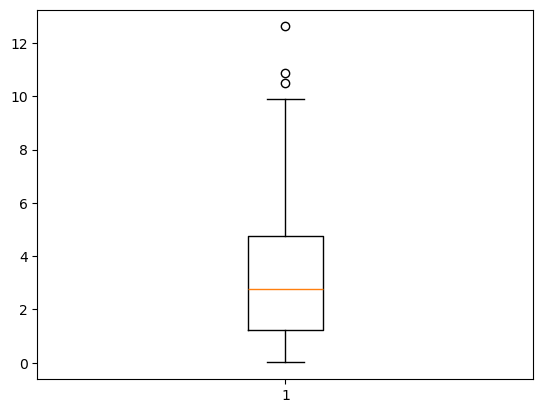

In [13]:
plt.boxplot(df['rate'])
plt.show

In [17]:
skews=skew(df['loan_amount'])
print(skews)

-0.03997926438774986


In [102]:
df['rate_norm']=np.sqrt(df['rate'])

C:\Users\haris\AppData\Local\Temp\ipykernel_15780\2611918855.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate_norm'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rate_norm', ylabel='Density'>

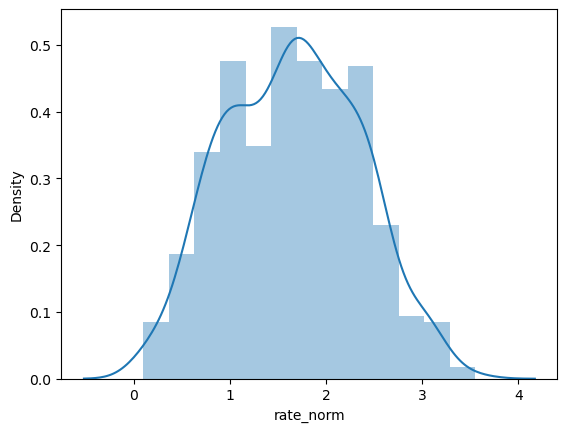

In [103]:
sns.distplot(df['rate_norm'])

In [106]:
df.rate.skew()


0.884204614329943

In [108]:
df.rate.kurtosis()

0.4243716514373652

In [109]:
df.rate_norm.skew()

0.04964154055528862

In [110]:
df.rate_norm.kurtosis()

-0.6318437642052039

Data Transformation